# Time Series Analysis

There are many situations in astronomy where we would like to characterize a time-varying signal: AGN variability, stellar pulsations, the rotation of asteroids, to name three examples. Exactly how we go about our analysis depends on the data and what we are looking for.

## Fourier Methods - Uniformly spaced data

Fourier analysis is the study of the way general functions may be represented or approximated by sums of simpler trigonometric functions. By decomposing a function in this sum we can get informations about the frequency of the period of these functions.
When we do a Fourier transform of a function of time, we decompose it into the frequencies that make it up.

$$ \hat{f}(\omega) = \int_{-\infty}^{\infty} f(t)\ e^{- 2\pi i x \omega}\,dt $$

In reality, we do not have a continuous sampling of data in time. Instead, we have a discreet sampling. Such cases require a discrete-time Fourier transform (DTFT) is a form of Fourier analysis that is applicable to uniformly-spaced samples of a continuous function. The term discrete-time refers to the fact that the transform operates on discrete data (samples) whose interval often has units of time.

$$ F(\omega) = \sum_{n=0}^{N-1} x[n] \,e^{-i \omega n} $$

### Let's plot a sin curve

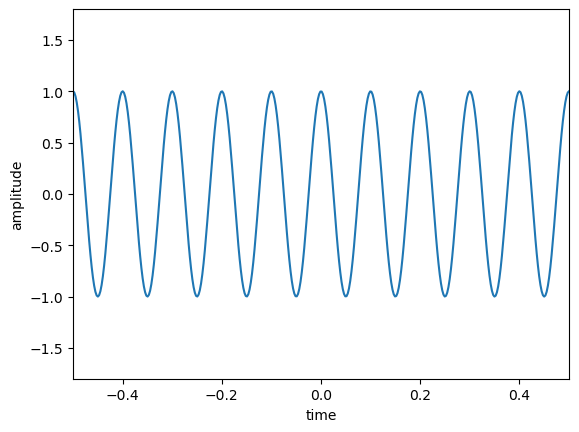

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


N = 400
t = np.linspace(-.5, .5, N)
f0 = 10
phi = np.pi/2
A =  1
x = A * np.sin(2 * np.pi * f0 * t + phi)


plt.plot(t, x)

plt.axis([-.5, .5, -1.8, 1.8])
plt.xlabel('time')
plt.ylabel('amplitude')

plt.show()

### Now, let's plot the discrete Fourier transform of that curve

Note we sampled the above curve with 400 discrete, evenly spaced data points. That allows us to use Fourier methods. The code to do so is very simple - we just call numpy's fast Fourier transform (fft) library.

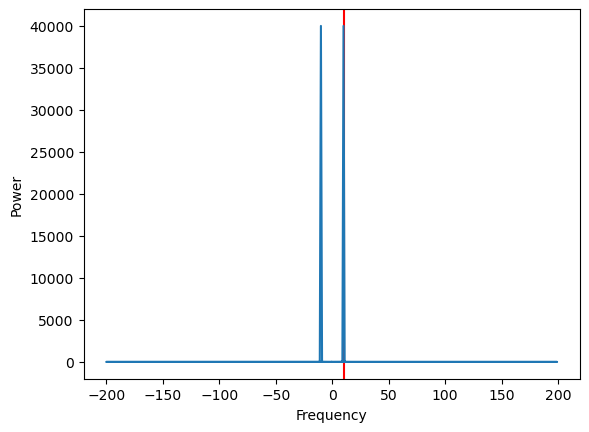

In [2]:
# This gives us the fourier transform - it is a power for every frequency
DFT = np.fft.fft(x)

# This gives us the frequencies associated with each fourier transform power
freq = np.fft.fftfreq(x.size) * N

# Plot the input frequency (10)
plt.axvline(10.0, color='r')

# Plot the fourier transform power as a function of the frequency
plt.plot(freq, np.abs(DFT)**2)

# Make plot pretty
plt.xlabel('Frequency')
plt.ylabel('Power')

plt.show()

Note that we have both positive and negative solutions. We want to ignore negative frequencies.

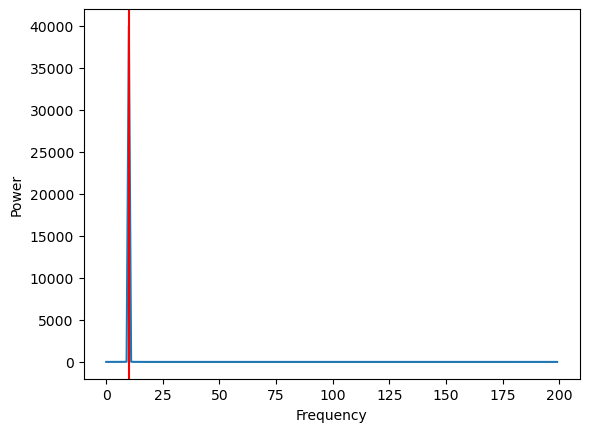

In [3]:
# Let's only take the positive half of the Fourier transform
half = len(x) // 2

# Plot the same as before, but only the positive values
plt.plot(freq[:half], np.abs(DFT[:half])**2)

# Plot the input frequency (10)
plt.axvline(10.0, color='r')

# Make plot pretty
plt.xlabel('Frequency')
plt.ylabel('Power')

plt.show()

### White Noise

Now, let's create some white noise by drawing random values from a Gaussian.

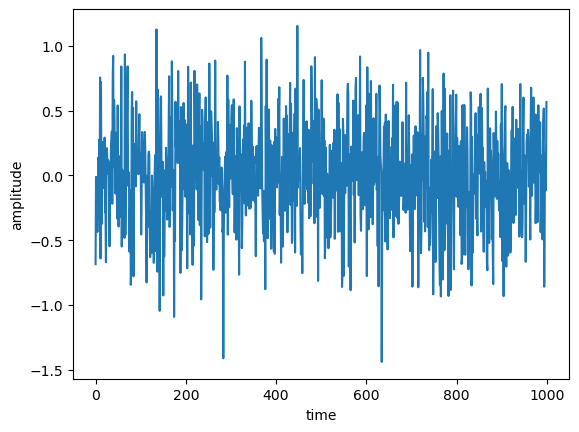

In [4]:
# 0 is the mean of the normal distribution you are choosing from
# .4 is the standard deviation of the normal distribution
# N is the number of elements you get in array noise

N = 1000
t = np.arange(N)

noise = np.random.normal(0,.4,N)

plt.plot(t, noise)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

Now, let's take the Fourier spectrum of that white noise below.

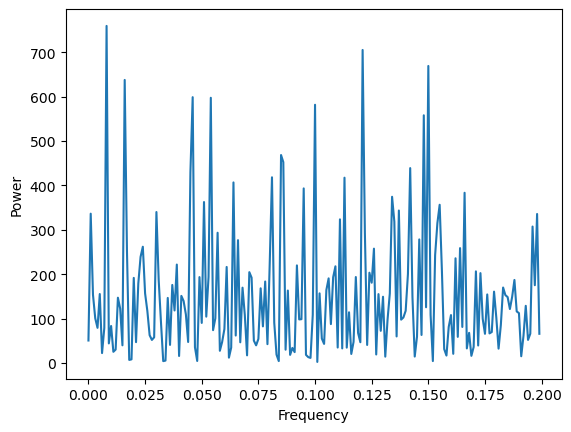

In [5]:
# First, we can take the Fourier transform to find the power per frequency
DFT = np.fft.fft(noise)

# Now, we have to calculate the frequencies
freq = np.fft.fftfreq(noise.size)

# Plot the data
plt.plot(freq[:half], np.abs(DFT[:half])**2)


plt.xlabel('Frequency')
plt.ylabel('Power')

plt.show()

### A Dirac delta function


Let's determine the Fourier transform of a Dirac delta function below. We'll do that by applying a Fourier transform to an array of zeros, with a single value set to 1.

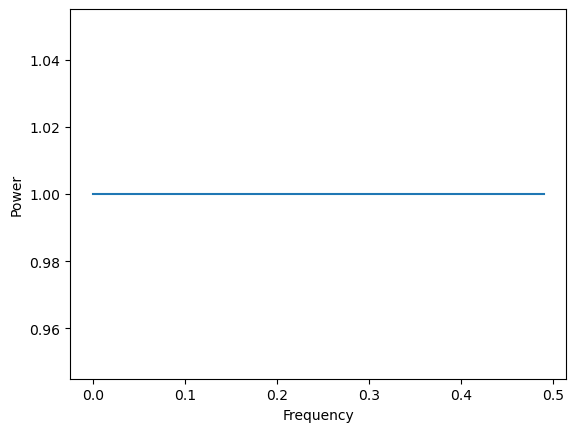

In [6]:
# Input array
tmp_x = np.zeros(100)
tmp_x[49] = 1.0

# Let's only take the positive half of the Fourier transform
half = len(tmp_x) // 2

# First, we can take the Fourier transform to find the power per frequency
DFT = np.fft.fft(tmp_x)

# Now, we have to calculate the frequencies
freq = np.fft.fftfreq(tmp_x.size)

# Plot the data
plt.plot(freq[:half], np.abs(DFT[:half])**2)


plt.xlabel('Frequency')
plt.ylabel('Power')

plt.show()

## A noisy power spectrum

Let's imagine that we have some periodic signal, comprised of three separate sine curves, each with their own amplitudes and frequencies. Can we detect those separate signals? It depends on how many data points we have and the relation between the amplitudes of the separate signals. With enough data, we can detect the signal, even when the noise dominates the signal.

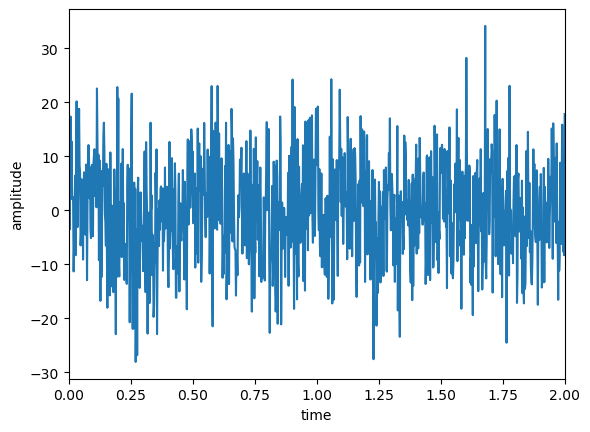

In [7]:
N_data = 1000
t_max = 2
half = N_data // 2

t = np.linspace(0, t_max, N_data)


# Set the frequencies of our periodic signals
f0 = 10
f1 = 20
f2 = 2

# Set the phases of our periodic signals
phi_1 = np.pi/3
phi_2 = np.pi/4

# Set the amplitudes of our periodic signals
A = 1
B = 2
C = 3
D = 9
noise = D*np.random.normal(0, 1.0, N_data)

# Output signal
S = A*np.sin(2*np.pi*f0*t + phi) + B*np.sin(2*np.pi*f1*t + phi_1) + C*np.sin(2*np.pi*f2*t + phi_2) + noise

# Plot things
plt.plot(t, S)

plt.xlim(0, t_max)

plt.xlabel('time')
plt.ylabel('amplitude')

plt.show()

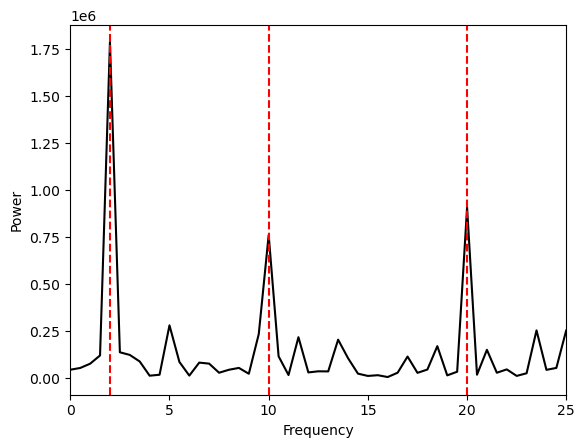

In [8]:
# Run the Fourier transforms
DFT = np.fft.fft(S)
freq = N_data/t_max*np.fft.fftfreq(S.size)

# Plot the frequencies
plt.plot(freq[:half], np.abs(DFT[:half])**2, color='k')

# Plot the input frequencies
plt.axvline(2, color='r', linestyle='dashed')
plt.axvline(10, color='r', linestyle='dashed')
plt.axvline(20, color='r', linestyle='dashed')

# Make the plot pretty
plt.xlabel('Frequency')
plt.ylabel('Power')

plt.xlim(0, 25)
plt.show()

### Discuss with your partner

The frequency precision is rather large in the above power spectrum. This is a limitation of the discrete Fourier transform; your frequency spacing is limited by your data. Without more data, we cannot characterize the fundamental frequencies more precisely. Try altering the values of `N_data` and `t_max` above to see how the frequency characterization changes. If we want a more precise characterization of the time series, do we simply need to observe for longer or do we also need a higher sampling rate.

## Unevenly spaced data: The Lomb-Scargle Periodogram

For unevenly sampled data, there is a special type of periodogram that is defined for arbitrary frequencies, called **Lomb-Scargle periodogram**. For $N$ data points $x_i$ at times $t_i$, the spectral power as a function of the angular frequency $\omega \equiv 2\pi f$ is:

$$ P_N(\omega) = \frac{1}{2\sigma^2} \left\{
    \frac{ \left[ \sum_j \left(x_j - \bar{x}\right)\cos{\omega\left(t_j - \tau\right)}\right]^2 }
         { \sum_j \cos^2{\omega\left(t_j - \tau\right)} }
  + \frac{ \left[ \sum_j \left(x_j - \bar{x}\right)\sin{\omega\left(t_j - \tau\right)}\right]^2 }
         { \sum_j \sin^2{\omega\left(t_j - \tau\right)} }
\right\} $$

(equation 13.8.3 in [1])

### Implementation in `scipy`
As with the `periodogram`, there is an implementation of the *LS* algorithm in the same sub-package, `scipy.signal.lombscargle`. It does not return frequencies, as in that case we define them explicitly.

>Be careful though: here the frequencies are ***angular***: $\omega_i = 2\pi f_i$

The syntax is the following:
> `<power spectral density> = lombscargle(<times>, <signal>, <requested angular frequencies>`

Additionally, we can add the argument `normalize=True` for automatic normalization of the periodogram to the total power of the signal.

### Historical note
All common generalizations of the standard periodogram for unevenly sampled data are based on fitting sinusoids with the method of least squares. The first **Least Square Spectral Analysis** method was the **Vaníček method** after Petr Vaníček.
Subsequent contributions from Nicholas Lomb and Jeffrey Scargle during the 70s and 80s resulted into the traditional tools we still use today.

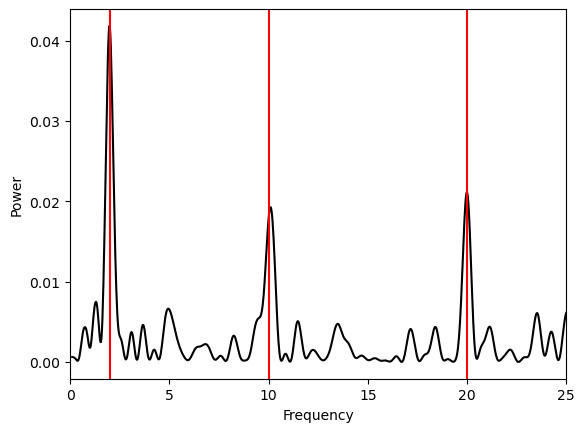

In [9]:
from scipy.signal import lombscargle

freq_max = 25
N_freq_test = 1000

# do not change these...
frequencies = np.linspace(0.1, freq_max, N_freq_test)
angular_frequencies = 2 * np.pi * frequencies


# create the periodograms
periodogram = lombscargle(t, S, angular_frequencies, normalize=True)

# Plot the periodogram
plt.plot(frequencies, periodogram, color="k")


plt.axvline(2, color='r')
plt.axvline(10, color='r')
plt.axvline(20, color='r')

plt.xlabel('Frequency')
plt.ylabel('Power')


plt.xlim(0, freq_max)
plt.show()

### Exercise: Discuss with your partner

Notice that the Lomb-Scargle test allows for one to find a much higher resolution than the Fourier transform. With your partner, change `N_freq_test` above and re-run the periodogram. How does the width of the frequency peak compare to the width of the Fourier transform results above?

## Further reading
### Confidence intervals
Detecting periodicity in a signal is a problem that we translate to a **peak detection problem** with periodograms (or simple discrete Fourier transform). Note that **even pure noise will display some peaks** (false alarms). Additional complications can be created by **spectral leakage** due to the discrete nature of measured signals.

Consequently, it is crucial to compute confidence intervals of the peak values for all frequencies in our periodogram. A method for doing so is described in [2].

### Solar Cycles

/tmp/ipykernel_308493/32054084.py:21: RuntimeWarning: divide by zero encountered in divide
  ax[1,0].plot(1.0/freqs, power, ".-", color='k')
/tmp/ipykernel_308493/32054084.py:27: RuntimeWarning: divide by zero encountered in divide
  ax[1,1].plot(1.0/freqs, power, ".-", color='k')


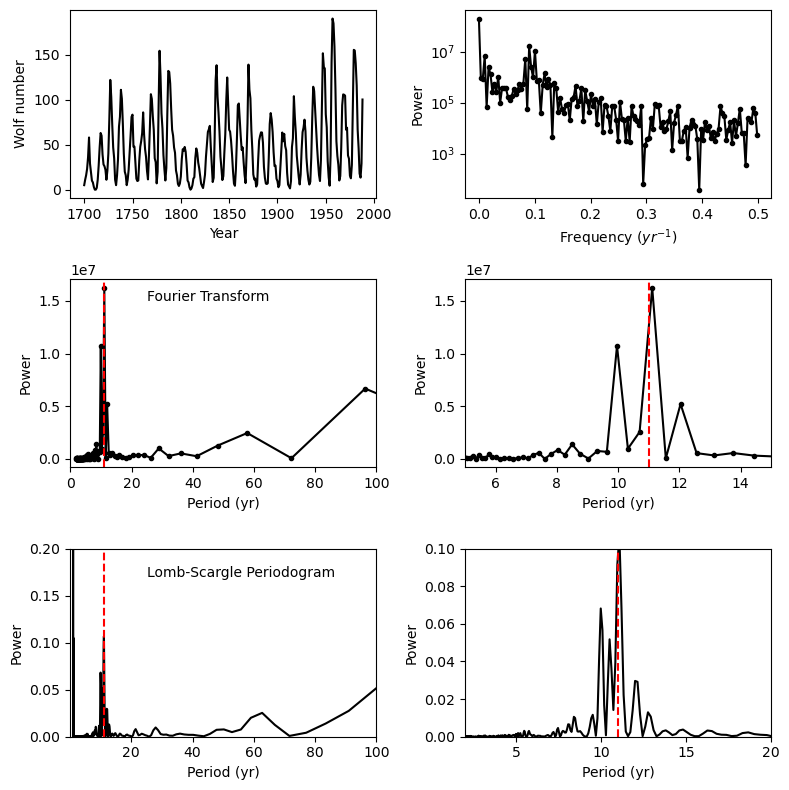

In [10]:
fig, ax = plt.subplots(3, 2, figsize=(8,8))

wolf = np.loadtxt("data/sunspots.txt")
year = 1700 + np.arange(len(wolf))
ax[0,0].plot(year, wolf, color='k')
ax[0,0].set_xlabel("Year")
ax[0,0].set_ylabel("Wolf number")


DFT = np.fft.rfft(wolf)
freqs = np.fft.rfftfreq(n=wolf.size)
power = np.abs(DFT) ** 2.0
ax[0,1].plot(freqs, power, ".-", color='k')
ax[0,1].set_xlabel("Frequency ($yr^{-1}$)")
ax[0,1].set_ylabel("Power")
ax[0,1].set_yscale("log")


# Fourier Transform
# plot power vs period for period < 25yr - ignore the constant term to avoid infinity
ax[1,0].plot(1.0/freqs, power, ".-", color='k')
ax[1,0].axvline(11, color="r", linestyle='dashed')
ax[1,0].set_xlim([0.0, 100.0])
ax[1,0].set_xlabel("Period (yr)")
ax[1,0].set_ylabel("Power")

ax[1,1].plot(1.0/freqs, power, ".-", color='k')
ax[1,1].axvline(11, color="r", linestyle='dashed')
ax[1,1].set_xlim([5.0, 15.0])
ax[1,1].set_xlabel("Period (yr)")
ax[1,1].set_ylabel("Power")

ax[1,0].text(25, 1.5e7, 'Fourier Transform')




# Lomb-Scargle Periodogram

N_freqs = 1000

# do not change these...
frequencies = np.linspace(0.01, 1.0, N_freqs)
angular_frequencies = 2 * np.pi * frequencies

# create the periodograms
periodogram = lombscargle(year, wolf, angular_frequencies, normalize=True)

# Plot the periodogram
ax[2,0].plot(1.0/frequencies, periodogram, color="k")
ax[2,1].plot(1.0/frequencies, periodogram, color="k")

ax[2,0].set_xlim(0.1, 100)
ax[2,0].set_ylim(0, 0.2)
ax[2,0].set_xlabel("Period (yr)")
ax[2,0].set_ylabel("Power")
ax[2,0].axvline(11, color="r", linestyle='dashed')


ax[2,1].set_xlim(2, 20)
ax[2,1].set_ylim(0, 0.1)
ax[2,1].set_xlabel("Period (yr)")
ax[2,1].set_ylabel("Power")
ax[2,1].axvline(11, color="r", linestyle='dashed')

ax[2,0].text(25, 0.17, 'Lomb-Scargle Periodogram')




plt.tight_layout()
plt.show()

### Discuss with your partner

Notice that there are similar peaks in the solar cycle at ~10 and ~12 years in both the Fourier Transform power spectrum and the Lomb-Scargle Periodogram. Discuss with your partner why that is the case. Let's say we measured the solar cycle for another 300 years. Assuming 11 years is the correct period of the solar cycle, how much better measured will the solar cycle period be after another 300 years of data?

/tmp/ipykernel_308493/3471867499.py:26: RuntimeWarning: divide by zero encountered in divide
  ax[1,0].plot(1.0/freqs, power, ".-", color='k')
/tmp/ipykernel_308493/3471867499.py:32: RuntimeWarning: divide by zero encountered in divide
  ax[1,1].plot(1.0/freqs, power, ".-", color='k')


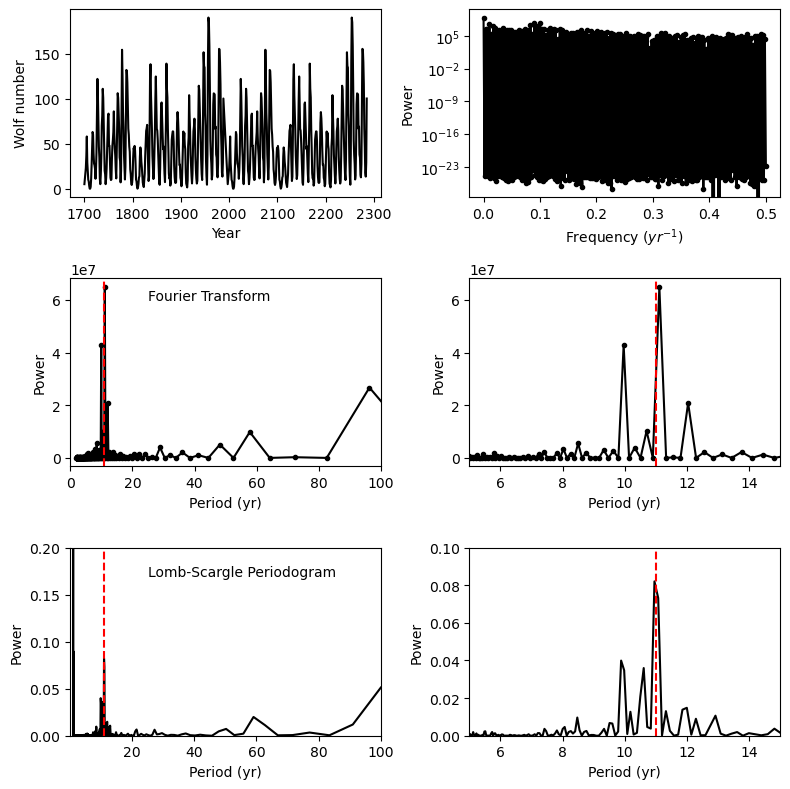

In [11]:
fig, ax = plt.subplots(3, 2, figsize=(8,8))

# Create fake data by doubling the current data
year_doubled = np.append(year, year+9+288)
wolf_doubled = np.append(wolf, wolf)



ax[0,0].plot(year_doubled, wolf_doubled, color='k')
ax[0,0].set_xlabel("Year")
ax[0,0].set_ylabel("Wolf number")


DFT = np.fft.rfft(wolf_doubled)
freqs = np.fft.rfftfreq(n=wolf_doubled.size)
power = np.abs(DFT) ** 2.0

ax[0,1].plot(freqs, power, ".-", color='k')
ax[0,1].set_xlabel("Frequency ($yr^{-1}$)")
ax[0,1].set_ylabel("Power")
ax[0,1].set_yscale("log")


# Fourier Transform
# plot power vs period for period < 25yr - ignore the constant term to avoid infinity
ax[1,0].plot(1.0/freqs, power, ".-", color='k')
ax[1,0].axvline(11, color="r", linestyle='dashed')
ax[1,0].set_xlim([0.0, 100.0])
ax[1,0].set_xlabel("Period (yr)")
ax[1,0].set_ylabel("Power")

ax[1,1].plot(1.0/freqs, power, ".-", color='k')
ax[1,1].axvline(11, color="r", linestyle='dashed')
ax[1,1].set_xlim([5.0, 15.0])
ax[1,1].set_xlabel("Period (yr)")
ax[1,1].set_ylabel("Power")

ax[1,0].text(25, 6e7, 'Fourier Transform')




# Lomb-Scargle Periodogram

N_freqs = 1000

# do not change these...
frequencies = np.linspace(0.01, 1.0, N_freqs)
angular_frequencies = 2 * np.pi * frequencies

# create the periodograms
periodogram = lombscargle(year_doubled, wolf_doubled, angular_frequencies, normalize=True)

# Plot the periodogram
ax[2,0].plot(1.0/frequencies, periodogram, color="k")
ax[2,1].plot(1.0/frequencies, periodogram, color="k")

ax[2,0].set_xlim(0.1, 100)
ax[2,0].set_ylim(0, 0.2)
ax[2,0].set_xlabel("Period (yr)")
ax[2,0].set_ylabel("Power")
ax[2,0].axvline(11, color="r", linestyle='dashed')


ax[2,1].set_xlim(5, 15)
ax[2,1].set_ylim(0, 0.1)
ax[2,1].set_xlabel("Period (yr)")
ax[2,1].set_ylabel("Power")
ax[2,1].axvline(11, color="r", linestyle='dashed')

ax[2,0].text(25, 0.17, 'Lomb-Scargle Periodogram')




plt.tight_layout()
plt.show()

## Cross-Correlation and Template Matching

### Cross-correlation
A **measure** of similarity of the two signals when a displacement (*lag*) if applied to one of them, is the **cross-correlation** [3]. Let $x(t)$ and $y(t)$ two integrable signals. The cross-correlation with lag $\tau$ of the two signals is:
$$
R_{xy}(\tau) = (x \star y)(\tau) \stackrel{\text{def}}{=}
\int\limits_{-\infty}^{\infty} x^{*}(t) y(t + \tau) dt \equiv
\int\limits_{-\infty}^{\infty} x^{*}(t - \tau) y(t) dt $$

Be careful with the similarity to **convolution**:
$$ (x \ast y)(\tau) \stackrel{\text{def}}{=} \int\limits_{-\infty}^{\infty} x(t) y(\tau - t) dt $$

### When do we use it?
The cross-correlation technique is used to find a signal, e.g. *a template*, in another signal (see *Matched Filter*, *Signal Matching*, *Pattern Recognition*). The position of the searched signal is the *lag* which if used in the above formula, gives maximum power.

### Relation to FT
The *Correlation theorem* states that
$$ \mathcal{F} \left\{ (x \star y)(\tau)\right\} = X^{*}(f) Y(f) $$
where
$$ X(f) = \mathcal{F}\left\{ x(t) \right\} $$
$$ Y(f) = \mathcal{F}\left\{ y(t) \right\} $$

### Example: a cross-correlogram for signal matching
In the lightcurve of a star, it is possible to observe flares. Let's say we have a model that produces sawtooth-like signals. We construct a "flare" with our model and we cross-correlate it with a given lightcurve.

Below, we simulate the signal as two successive flares of different amplitude. We also add background and Poisson noise. Additionally, the second flare is altered (exponent $0.333$) to make it less steep: astrophysical processes are much more complicated than our models!

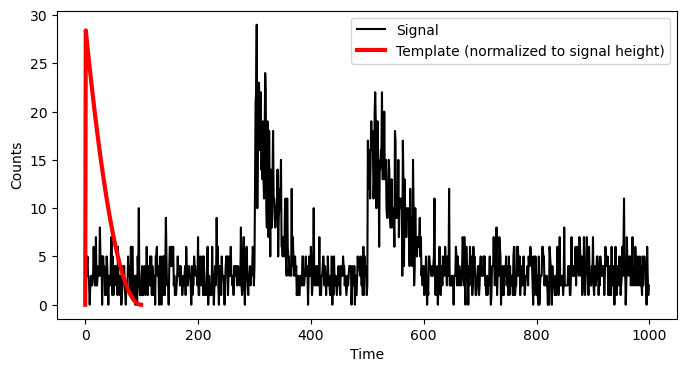

In [12]:
from scipy.signal import correlate, periodogram, lombscargle, sawtooth

# Template creation
t = np.linspace(0, 1, 100)                         # phase in [0, 1] for the template
A = ((sawtooth(-2 * np.pi * t) + 1) / 2) ** 2.0    # the sawtooth template

# Signal parameters
amplitude1 = 20                                    # amplitude of first flare
amplitude2 = 13                                    # amplitude of second flare
background = 3                                     # background level
shot_noise = True                                  # wether to add Poisson noise or not

# Simulate a signal
B = np.zeros(1000)                                 # start from baseline 0
B[300:400] = amplitude1 * A                        # add first flare
B[500:600] = amplitude2 * A ** 0.333               # add second flare ('distorted')
B += background                                    # add background
if shot_noise:
    B = np.random.poisson(B)                       # add Poisson noise

    
plt.figure(figsize=(8,4))
plt.plot(B, "k-", label="Signal")
plt.plot(A * np.max(B), "r-", lw=3, label="Template (normalized to signal height)")
plt.xlabel("Time")
plt.ylabel("Counts")
plt.legend()
plt.show()

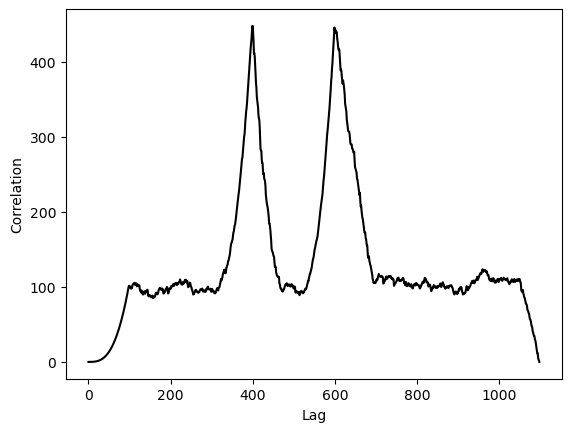

In [13]:
C = correlate(B, A)      # cross-correlate the signal with the template
plt.plot(C, "k-")            # shift by the length of the template
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

## Auto-correlation
If we cross-correlate the signal with itself, $x(t) = y(t)$, then we have an *auto-correlation*:
$$ (x \star x)(\tau) = \int\limits_{-\infty}^{\infty} x^{*}(t - \tau) x(t) dt \leftrightarrow \left| X(f) \right|^2 $$
> The Fourier transform of the auto-correlation is the power spectrum! This is the **Wiener-Khinchin Theorem**

### When do we use it?
Why would it be useful to correlate a signal with itself? When we apply a *lag* $\tau$ to a signal and cross-correlated it with itself, then if there is a **repeating pattern** with period $\tau$, then the power will be higher than in the cases of irrelevant time lags.
>Note: the maximum power is always yielded for $\tau=0$ as it corresponds to the total power of the signal

### Power Spectral Density
The *two-sided Power Spectral Density (PSD)* of $x(t)$ is:
$$ PSD_x(f) = \frac{1}{2} \left( \left|X(f)\right|^2 + \left|X(-f)\right|^2 \right) $$
For a ***real*** signal, $x(t) \in \mathcal{R}$:
$$ X(f) = X^{*}(-f)
    \quad \Rightarrow \quad \left|X(f)\right| = \left|X(-f)\right|
    \quad \Rightarrow \quad PSD_x(f) = \left|X(f)\right|^2
$$


### Discuss with your partner
When would you use an autocorrelation method? Try to come up with two examples of where this is useful.

### Example: an auto-correlogram for periodicity searching
The cross-correlogram of the signal with itself is called auto-correlogram. Let's apply it for the previous example's signal.

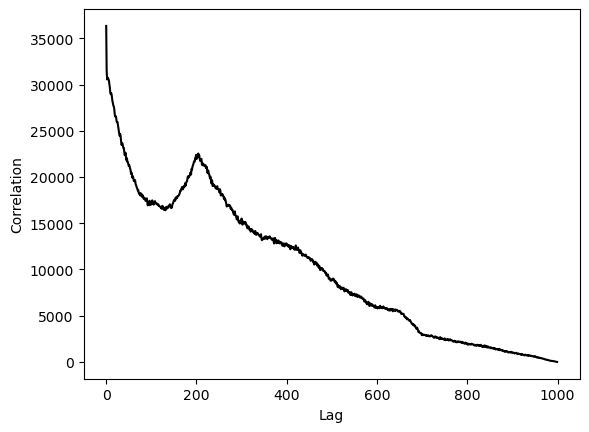

In [14]:
D = correlate(B, B)   # auto-corrleation
D = D[D.size // 2:]   # take half the output (it's like DFT symmetry)
plt.plot(D, "k-")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

## Conclusions

When dealing with time series data, there are several techniques. First consider whether you have evenly sampled data or not. Some methods (e.g., Fourier transforms) work best on evenly sampled data (or data that can be filled in to become evenly sampled), whereas the Lomb-Scargle periodogram works for unevenly sampled data. Second, consider the signal you are trying to find. Is it periodic or quasi-periodic? Are you looking for a one-time event? Cross-correlations with templates may be useful for non-periodic signals.

## References

[1] Press, W. H., Teukolsky, A. S., Vetterling, W. T. and Flannery, B. P. (2007). "Numerical Recipes: The Art of Scientific Programming" (3rd Edition). Cambridge University Press.

[2] Horne, J. H and Baliunas, S. L. (1986). "A prescription for period analysis of unevenly sampled time series". The Astrophysical Journal, 302: 757-763.